In [5]:
%pip install -r ./cogvlm/requirements.txt
%pip install maestro

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import torch
import maestro

import numpy as np
import supervision as sv

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
generator = maestro.SegmentAnythingMarkGenerator(device=device)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [8]:
image = cv2.imread("/notebooks/scene.png")
marks = generator.generate(image=image)

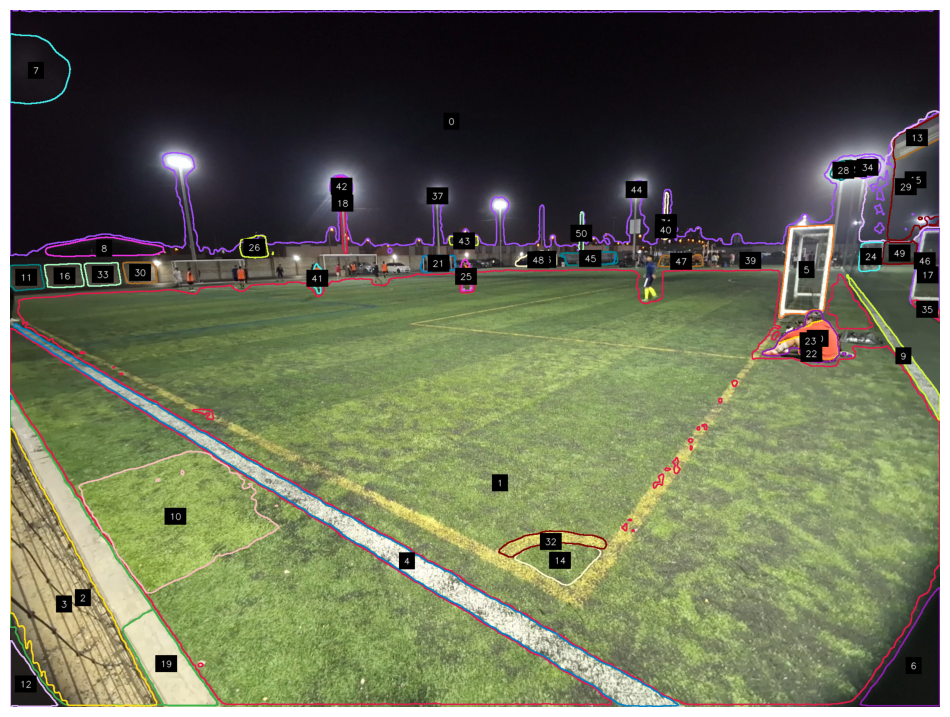

In [9]:
mark_visualizer = maestro.MarkVisualizer()
marked_image = mark_visualizer.visualize(image=image, marks=marks)
sv.plot_image(marked_image)
     

In [10]:
refined_marks = maestro.refine_marks(marks=marks, minimum_mask_area=0.04)


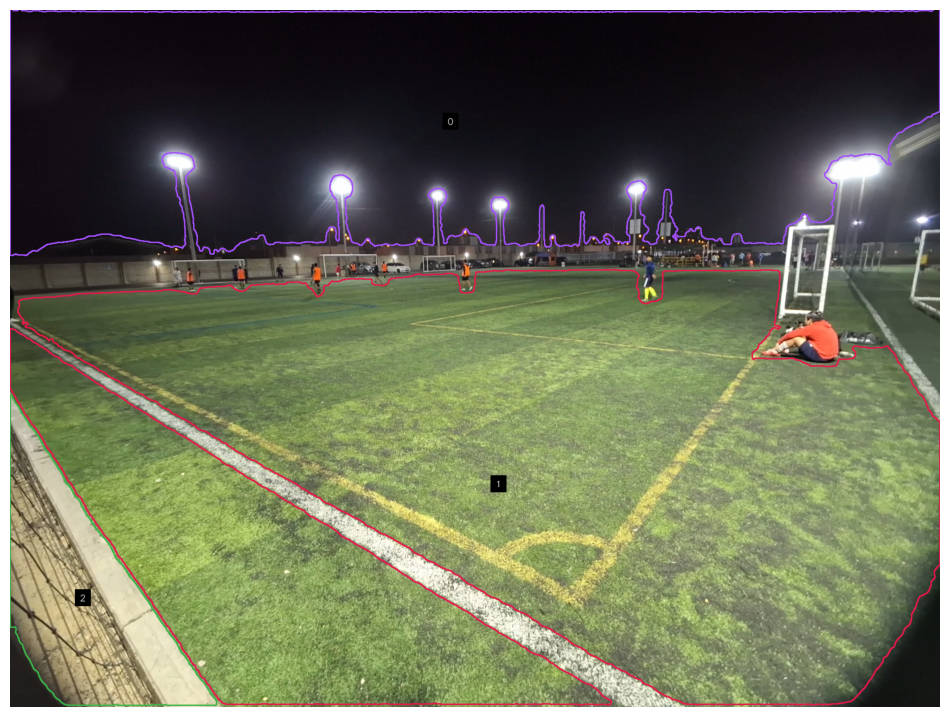

In [11]:

mark_visualizer = maestro.MarkVisualizer()
marked_image = mark_visualizer.visualize(image=image, marks=refined_marks)
sv.plot_image(marked_image)


In [12]:
# save marked image to a temporary file
marked_image_path = "/tmp/marked_image.png"

cv2.imwrite(marked_image_path, marked_image)

True

In [1]:
command = "python ./cogvlm/vision.py --image='/tmp/marked_image.png' --query="""

!{command}

Loading checkpoint shards: 100%|██████████████████| 8/8 [00:21<00:00,  2.69s/it]
/usr/local/lib/python3.9/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')
The image showcases a soccer field during nighttime. There are several players on the field, some are actively playing while others seem to be resting or waiting. The field is illuminated by bright floodlights, and there are markings on the field, indicating specific areas for play. The background shows a cityscape with buildings and lights, suggesting that the field is located in an urban area.</s>


In [4]:
# chat example

query = 'Describe this image'
image = Image.open(requests.get('https://github.com/THUDM/CogVLM/blob/main/examples/1.png?raw=true', stream=True).raw).convert('RGB')
inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[image])  # chat mode
inputs = {
    'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
    'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
    'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
    'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
}
gen_kwargs = {"max_length": 2048, "do_sample": False}

with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    print(tokenizer.decode(outputs[0]))

# This image captures a moment from a basketball game. Two players are prominently featured: one wearing a yellow jersey with the number
# 24 and the word 'Lakers' written on it, and the other wearing a navy blue jersey with the word 'Washington' and the number 34. The player
# in yellow is holding a basketball and appears to be dribbling it, while the player in navy blue is reaching out with his arm, possibly
# trying to block or defend. The background shows a filled stadium with spectators, indicating that this is a professional game.</s>



/usr/local/lib/python3.9/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:


# vqa example

query = 'How many houses are there in this cartoon?'
image = Image.open(requests.get('https://github.com/THUDM/CogVLM/blob/main/examples/3.jpg?raw=true', stream=True).raw).convert('RGB')
inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[image], template_version='vqa')   # vqa mode
inputs = {
    'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
    'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
    'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
    'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
}
gen_kwargs = {"max_length": 2048, "do_sample": False}

with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    print(tokenizer.decode(outputs[0]))